In [64]:
#defaul libraries
#https://docs.python.org/ja/
import math
import random

import numpy as np #https://numpy.org/
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import sklearn #https://scikit-learn.org/stable/

In [65]:
class CFG():
    input_path="./"#../input/tabular-playground-series-mar-2021/"
    debug=True

    seed=random.randint(0,100)



In [66]:
target_columns=['SalePrice']
def feature_columns(df):
    for col in df.columns:
        if col in target_columns:df=df.drop(columns=col)
    return  df.columns
def numerical_columns(df):
    return df[feature_columns(df)].select_dtypes(include=['int64','float64']).columns
def categorical_columns(df):
    return df[feature_columns(df)].select_dtypes(exclude=['int64','float64']).columns

In [67]:
train=pd.read_csv(CFG.input_path+'train.csv',index_col='Id')
test=pd.read_csv(CFG.input_path+'test.csv',index_col='Id')

all_data=pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']])

In [68]:
import pandas_profiling
def simple_eda(df):
    """
    simple_eda
    """
    print("-"*40+"EDA"+"-"*40)
    print("type:",type(df))
    print("-"*40+"head"+"-"*40)
    display(df.head())
    print("-"*40+"describe"+"-"*40)
    display(df.describe())
    print("-"*40+"info"+"-"*40)
    print(df.info())

    display(df.profile_report())

In [69]:
#simple_eda(train)

In [70]:
from scipy.stats import skew

%matplotlib inline
#目的変数を対数変換
prices=pd.DataFrame({'price':train['SalePrice'],'log(price+1)':np.log1p(train['SalePrice'])})

In [71]:
prices

,price,log(price+1)
Id,,
1,208500,12.247699
2,181500,12.109016
3,223500,12.317171
4,140000,11.849405
5,250000,12.429220
...,...,...
1456,175000,12.072547
1457,210000,12.254868
1458,266500,12.493133


In [72]:
#対数変換前後での歪度を比較
print(skew(prices['price']))
print(skew(prices['log(price+1)']))

1.880940746034036
0.12122191311528359


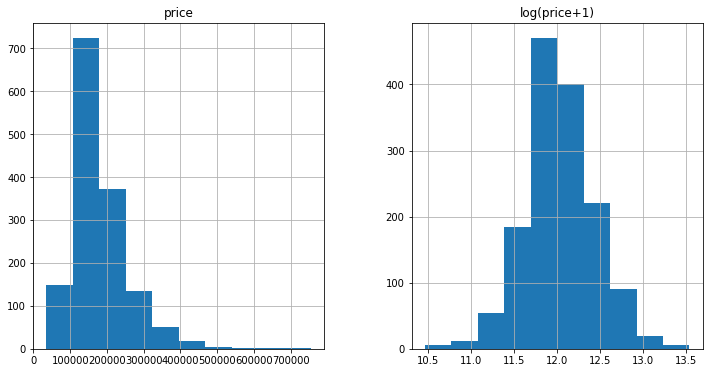

In [73]:
plt.rcParams['figure.figsize']=(12.0,6.0)
prices.hist()
plt.show()

In [74]:
train['SalePrice']=np.log1p(train['SalePrice'])

In [75]:
train['SalePrice']

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
1456    12.072547
1457    12.254868
1458    12.493133
1459    11.864469
1460    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [76]:
print(numerical_columns(all_data))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [77]:
#歪度を求める
skewed_feats=train[numerical_columns(train)].apply(lambda x: skew(x.dropna()))

In [78]:
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64

In [79]:
#歪度が0.75以上のものを対数変換
skewed_feats=skewed_feats[skewed_feats>0.75]

In [80]:
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64

In [81]:
skewed_feats=skewed_feats.index
all_data[skewed_feats]=np.log1p(all_data[skewed_feats])
all_data[skewed_feats]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,...,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
2,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,...,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,...,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
4,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,...,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
5,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,...,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,5.081404,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2916,5.081404,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
2917,3.044522,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,...,7.110696,0.000000,0.693147,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [82]:
set(train['LotShape'])

{'IR1', 'IR2', 'IR3', 'Reg'}

In [83]:
#カテゴリカル・データの例
cc_data=pd.get_dummies(train['LotShape'])
cc_data['LotShape']=train['LotShape']
cc_data

,IR1,IR2,IR3,Reg,LotShape
Id,,,,,
1,0,0,0,1,Reg
2,0,0,0,1,Reg
3,1,0,0,0,IR1
4,1,0,0,0,IR1
5,1,0,0,0,IR1
...,...,...,...,...,...
1456,0,0,0,1,Reg
1457,0,0,0,1,Reg
1458,0,0,0,1,Reg


In [84]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal
2,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal
3,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal
4,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml
5,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,5.081404,RM,3.091042,7.568896,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,6,2006,WD,Normal
2916,5.081404,RM,3.091042,7.546974,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,4,2006,WD,Abnorml
2917,3.044522,RL,5.081404,9.903538,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.000000,9,2006,WD,Abnorml


In [85]:
#カテゴリカル・データを自動検出してダミー変数に置き換え
all_data=pd.get_dummies(all_data)

In [90]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
4,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
5,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
2916,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,1,1,0,0,0,0,0


In [109]:
[all_data.isnull().any()]

False

In [123]:
#trainの平均値でnaを置き換え
all_data=all_data.fillna(all_data[:train.shape[0]].mean())

<h1>model</h1>

In [127]:

X_train=all_data[:train.shape[0]]
X_test=all_data[train.shape[0]:]
y=train.SalePrice



In [125]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    """二乗平均平方根誤差
    
    Parameters:
      model(obj): Modelオブジェクト
    Returns:
      (float)訓練データの出力値と正解値とのRMSE
    """
    # クロスバリデーションによる二乗平均平方根誤差の取得
    rmse = np.sqrt(
        -cross_val_score(
            model, X_train, y,
            scoring="neg_mean_squared_error", # 平均二乗誤差を指定
            cv = 5))                          # データを5分割
    return(rmse)

Ridge RMSE loss:
0.05     0.138937
0.10     0.137777
0.50     0.133467
1.00     0.131362
5.00     0.127821
10.00    0.127337
15.00    0.127529
30.00    0.128958
50.00    0.130994
75.00    0.133163
dtype: float64 

Ridge RMSE loss Mean:
0.13173438128730297


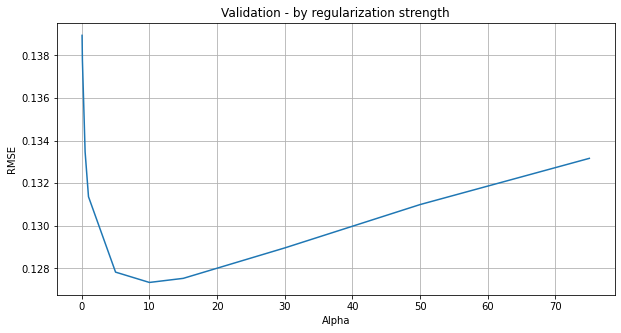

In [130]:
from sklearn.linear_model import Ridge

# リッジ回帰モデルを生成
model_ridge = Ridge()

# L2正則化の強度を10パターン用意
alphas = [0.05, 0.1, 0.5, 1, 5, 10, 15, 30, 50, 75]
# 正則化の各強度でリッジ回帰を実行
# 5分割のクロスバリデーションでRMSEを求め、その平均を取得
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]


# cv_ridgeをSeriesオブジェクトに変換
cv_ridge = pd.Series(cv_ridge, index = alphas)
# スコアを出力
print('Ridge RMSE loss:')
print(cv_ridge, '\n')
# スコアの平均を出力
print('Ridge RMSE loss Mean:')
print(cv_ridge.mean())

# 正則化の強度別のスコアをグラフにする
plt.ﬁgure(ﬁgsize=(10, 5)) # 描画エリアのサイズ
plt.plot(cv_ridge)        # cv_ridgeをプロット
plt.grid()                # グリッド表示
plt.title('Validation - by regularization strength')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

In [131]:
from sklearn.linear_model import LassoCV

# ラッソ回帰モデルで推定する
# L1正則化項を4パターンで試す
model_lasso = LassoCV(
    alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

print('Lasso regression RMSE loss:')                # クロスバリデーションによる
print(rmse_cv(model_lasso))                         # RMSEを出力

print('Average loss:', rmse_cv(model_lasso).mean()) # RMSEの平均を出力
print('Minimum loss:', rmse_cv(model_lasso).min())  # RMSEの最小値を出力
print('Best alpha  :', model_lasso.alpha_)          # 採用されたalpha値を出力

Lasso regression RMSE loss:
[0.10330995 0.13147299 0.12552458 0.10530461 0.14723333]
Average loss: 0.12256909294466993
Minimum loss: 0.10330995071896432
Best alpha  : 0.0005


In [132]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
#dtest = xgb.DMatrix(X_test)

# 決定木の深さ3、学習率0.1
params = {"max_depth":3, "eta":0.1}
# xgboostモデルでクロスバリデーションを実行
cross_val = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,     # 決定木の本数
    early_stopping_rounds=50) # アーリーストッピングの監視回数
cross_val

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.380516,0.003151,10.380511,0.007226
1,9.345149,0.002914,9.345144,0.007586
2,8.413391,0.002711,8.413386,0.007926
3,7.574889,0.002511,7.575220,0.007951
4,6.820173,0.002320,6.820488,0.007688
...,...,...,...,...
405,0.040728,0.000315,0.125469,0.013440
406,0.040664,0.000320,0.125464,0.013418
407,0.040607,0.000326,0.125434,0.013416
408,0.040534,0.000332,0.125432,0.013409


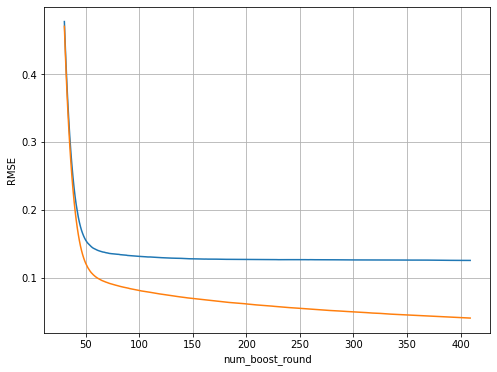

In [133]:
# 30回以降の検証データと訓練データのRMSEをグラフにする
plt.ﬁgure(ﬁgsize=(8, 6)) # 描画エリアのサイズ
plt.plot(cross_val.loc[30:,["test-rmse-mean", "train-rmse-mean"]])
plt.grid()               # グリッド表示
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

In [135]:
# xgboostで学習する
model_xgb = xgb.XGBRegressor(
    n_estimators=410,  # 決定木の本数
    max_depth=3,       # 決定木の深さ
    learning_rate=0.1) # 学習率0.1
model_xgb.fit(X_train, y)

print('xgboost RMSE loss:')
print(rmse_cv(model_xgb).mean())

xgboost RMSE loss:
0.12437590040488114


In [136]:
lasso_preds = np.expm1(model_lasso.predict(X_test))
xgb_preds = np.expm1(model_xgb.predict(X_test))

In [137]:
preds = lasso_preds*0.7 + xgb_preds*0.3

In [145]:
solution = pd.DataFrame({"id":test.index, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

In [146]:
solution


,id,SalePrice
0,1461,121573.647167
1,1462,153387.333735
2,1463,182805.267147
3,1464,195889.974031
4,1465,196234.496197
...,...,...
1454,2915,86317.412722
1455,2916,85057.289942
1456,2917,164630.537275
1457,2918,117468.855503
